In [1]:
import torch
import torch.nn as nn

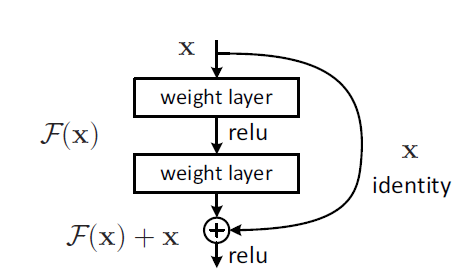
Residual Block

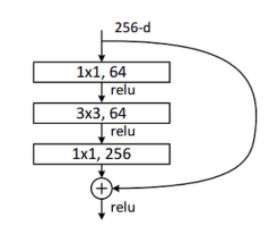
BottleNeck

In [2]:
class BottleNeck(nn.Module):
    expansion = 4
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.residual_function = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, stride=stride, kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels * BottleNeck.expansion, kernel_size=1, bias=False),
        nn.BatchNorm2d(out_channels * BottleNeck.expansion),
        )
        
        self.shortcut = nn.Sequential()
        
        if stride != 1 or in_channels != out_channels * BottleNeck.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BottleNeck.expansion, stride=stride, kernel_size=1, bias=False),
                nn.BatchNorm2d(out_channels * BottleNeck.expansion))
    def forward(self, x):
        return nn.ReLU(inplace=True)(self.residual_function(x) + self.shortcut(x))  

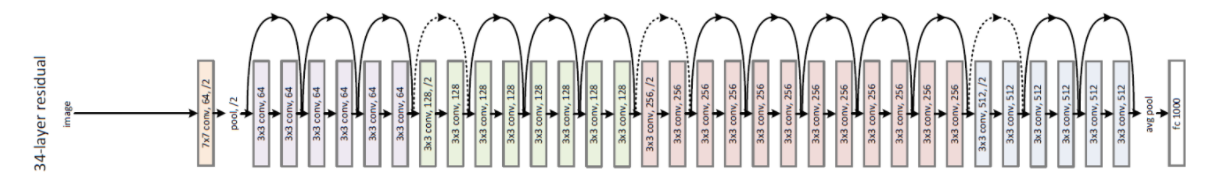
ResNet Architecture

In [11]:
class ResNet(nn.Module):
    
    def __init__(self, block, num_block, num_classes=10):
        super().__init__()
        self.in_channels = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True))
        self.conv2_x = self._make_layer(block, 64, num_block[0], 1)
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2)
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2)
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        output = self.conv3_x(output)
        output = self.conv4_x(output)
        output = self.conv5_x(output)
        output = self.avg_pool(output)
        output = output.view(output.size(0), -1)
        output = self.fc(output) # => 이미지 크기가 
                                 #바뀌면 이 줄 코드를 # 하고 dimension 확인

        return output

In [12]:
stride=[2]+[1]*(8 -1)

In [13]:
stride

[2, 1, 1, 1, 1, 1, 1, 1]

In [14]:
def resnet152():
    return ResNet(BottleNeck, [3, 8, 36, 3])

In [15]:
def dimension_check():
    net=resnet152()
    x= torch.randn(1,3,32,32) # 28 이미지
    y=net(x)
    print(y.size())

In [16]:
dimension_check()

torch.Size([1, 10])
